In [1]:
import pickle 
import torch 
import matplotlib.pyplot as plt
from tqdm import tqdm
import librosa 
import numpy as np

In [2]:
ckpt_path = "../data/LibriSpeech/cache/dev-clean/baseline.pkl"
with open(ckpt_path, "rb") as f:
    checkpoint = pickle.load(f)
    utterances = checkpoint["anonymized_utterances"]
    speaker_ids = checkpoint["speaker_ids"]

In [4]:
len(utterances), len(speaker_ids)

(2703, 40)

100%|██████████| 2703/2703 [00:19<00:00, 137.99it/s]

Mean: 224.76, std 146.71


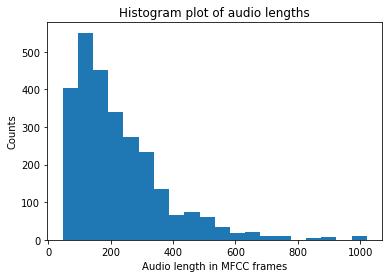

In [3]:
SAMPLE_RATE = 16000

def count_mfcc_lens(utterances):
    lengths = []
    for utt in tqdm(utterances):
        y = utt.numpy().T  # (1, T)
        #print(y.shape)
        
        mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc=20)
        lengths.append(mfcc.shape[-1])
    return lengths 

lengths = count_mfcc_lens(utterances)
print("Mean: {:.2f}, std {:.2f}".format(
    np.mean(lengths), np.std(lengths)
))
plt.hist(lengths, bins=20)
plt.xlabel("Audio length in MFCC frames")
plt.ylabel("Counts")
plt.title("Histogram plot of audio lengths")
plt.savefig("audio_histogram.svg")

In [6]:
long_counts = (np.array(lengths) > 50).sum()
print(long_counts, long_counts / len(lengths))

2699 0.998520162782094
